In [1]:
# usual imports
import os
import numpy as np
import matplotlib.pyplot as plt

from rail.core.utils import RAILDIR
#from rail.estimation.algos.bpz_version.utils import RAIL_BPZ_DIR
from rail.pipelines.estimation.estimate_all import EstimatePipeline
from rail.core import common_params

from rail.pipelines.utils.name_factory import NameFactory, DataType, CatalogType, ModelType, PdfType
#from rail.core.stage import RailStage, RailPipeline

import qp

#import ceci

Imported rail.hub
Imported rail.astro_tools
Imported rail.core
Imported rail.stages
Imported rail.bpz
Imported rail.cmnn
Imported rail.delight
Failed to import rail.dsps because: No module named 'rail.creation.engines.galaxy_population_components'
Imported rail.flexzboost
Failed to import rail.gpz because: No module named 'rail.estimation.algos.gpz_v1'
Imported rail.pipelines
Failed to import rail.pzflow because: No module named 'rail.estimation.algos.pzflow'
Imported rail.sklearn
Imported rail.som
Attached 10 base classes and 50 fully formed stages to rail.stages


In [2]:
bands = 'grizy'
maglims = [27.66, 27.25, 26.6, 26.24, 25.35]
maglim_dict={}
for band,limx in zip(bands, maglims):
    maglim_dict[f"HSC{band}_cmodel_dered"] = limx

In [3]:
common_params.set_param_defaults(
    bands=[f'HSC{band}_cmodel_dered' for band in bands],
    err_bands=[f'{band}_cmodel_magerr' for band in bands],
    nondetect_val=np.nan,
    ref_band='HSCi_cmodel_dered',
    redshift_col='specz_redshift',
    mag_limits=maglim_dict,
    zmax=6.0,
)

In [4]:
pipe = EstimatePipeline()

In [5]:
namer = NameFactory()

In [6]:
datadir = '/Users/jtm/data/lsst/PZ/'
input_file = os.path.join(datadir, 'dered_223501_sz_match_pdr3_dud_NONDET.hdf5') # hsc_train/

input_dict = dict(
    model_fzboost=os.path.join(namer.get_data_dir(DataType.model, ModelType.estimator), "model_FZBoost.hdf5"), #_fzboost                                                
    model_trainz=os.path.join(namer.get_data_dir(DataType.model, ModelType.estimator), "model_trainz.pkl"),
    input=input_file,
)

In [7]:
pipe_info = pipe.initialize(input_dict, dict(output_dir='.', log_dir='.', resume=True), None)

Skipping stage estimate_fzboost because its outputs exist already


In [8]:
pipe.save('tmp_estimate_all.yml')

In [9]:
import ceci
pr = ceci.Pipeline.read('tmp_estimate_all.yml')

Skipping stage estimate_fzboost because its outputs exist already


In [ ]:
pr.run()

In [10]:
infile = '/Users/jtm/repositories/rail_pipelines/nb/estimation/pdf/pz/output_FZBoost.hdf5'

qp_ensemble = qp.read(infile, )

print(qp_ensemble.npdf)
print(qp_ensemble.ancil)

In [38]:
qp_ensemble.dist.yvals.shape

(186884, 301)

In [42]:
qp_ensemble.rvs(size=1)

array([[0.48028432],
       [0.26491242],
       [0.21140595],
       ...,
       [0.38872968],
       [1.58618952],
       [0.97573275]])

<Axes: xlabel='redshift', ylabel='p(z)'>

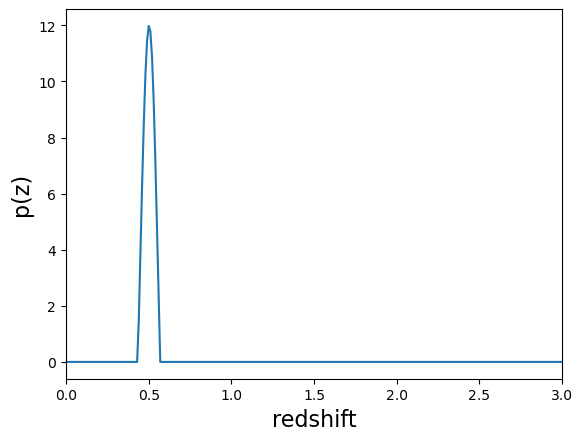

In [29]:
qp_ensemble[4].plot_native(xlim=(0,3))

In [31]:
qp_ensemble.pdf(0.5)

array([[9.36878792],
       [0.        ],
       [0.        ],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [11]:
plt.figure()
plt.hist(qp_ensemble.ancil['zmode'], bins=40)

In [22]:
# from rail.core import RailStage
# dir(RailStage)
# DS = RailStage.data_store
# DS.keys()